# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [17]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\annma\AppData\Local\Temp\ipykernel_29396\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

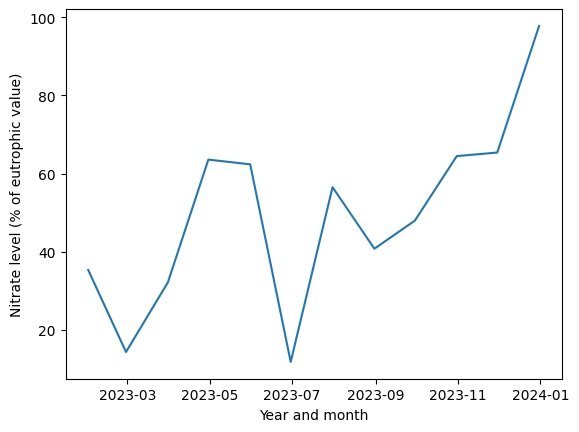

In [18]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\annma\AppData\Local\Temp\ipykernel_29396\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

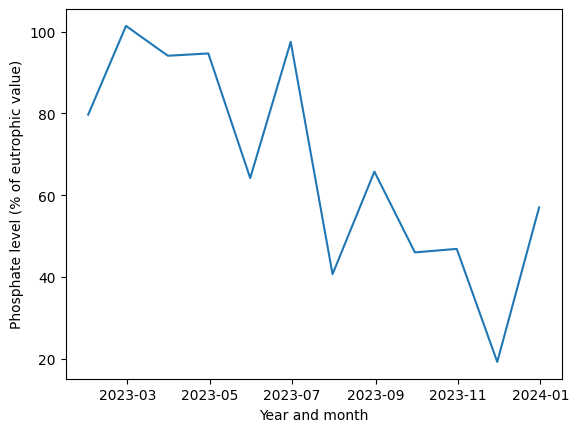

In [19]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

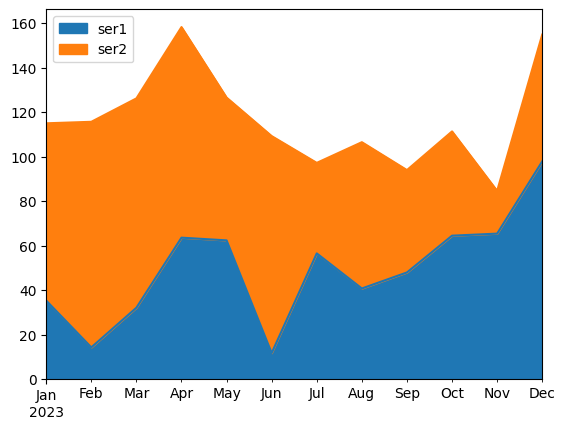

In [20]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()


If you're trying to show nitrate and phosphate levels in a water sample, the way you choose to display the data really affects how easy it is to understand. Looking at the two separate line graphs, it's easy to follow how each nutrient changes over time. You can clearly see that nitrate levels go up and down in a different pattern than phosphate levels, which makes it great for spotting individual trends. The downside, though, is that you have to flip between the two graphs to compare them. It’s not immediately obvious how the two nutrients relate to each other in a single glance.

On the other hand, the area plot stacks both nutrients together in one graph, which is helpful if you want to emphasize the overall nutrient load. It’s more compact and visually striking. But in this case, it's harder to see exactly how the phosphate levels change on their own because they’re stacked on top of the nitrate levels. That makes it a bit tricky to tell whether phosphate is rising or falling just by looking at the top of the orange section.

To improve the graphs, I’d suggest renaming the area plot’s legend from “ser1” and “ser2” to something clearer like “Nitrate” and “Phosphate.” The colors could also be more transparent so you can better see how the data overlap. For the two line graphs, it would help if the y-axes were on the same scale so viewers could more easily compare the two charts. Even better, combining both lines into a single graph with different colors would let you compare trends side-by-side without losing clarity. That way, you keep the strengths of the line graphs while still saving space and making the comparison more direct.


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [22]:
# Load the dataset
df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")  

##CKD Dataset

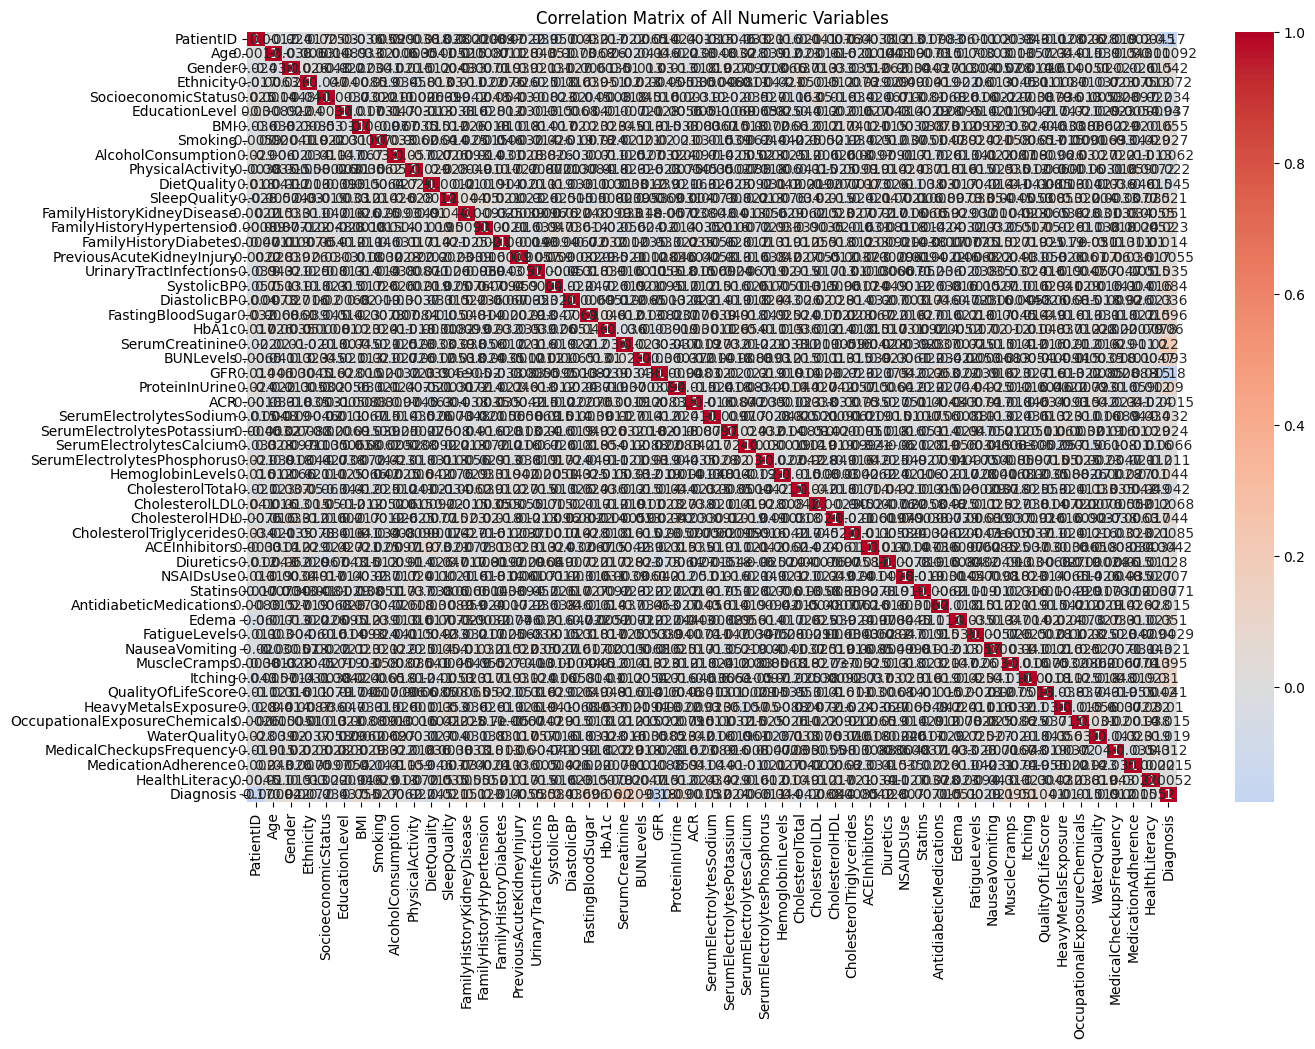

In [23]:
# Compute correlation matrix for all numeric variables
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, center=0)
plt.title("Correlation Matrix of All Numeric Variables")
plt.show()


##YIKES! lets try again with the top correlations

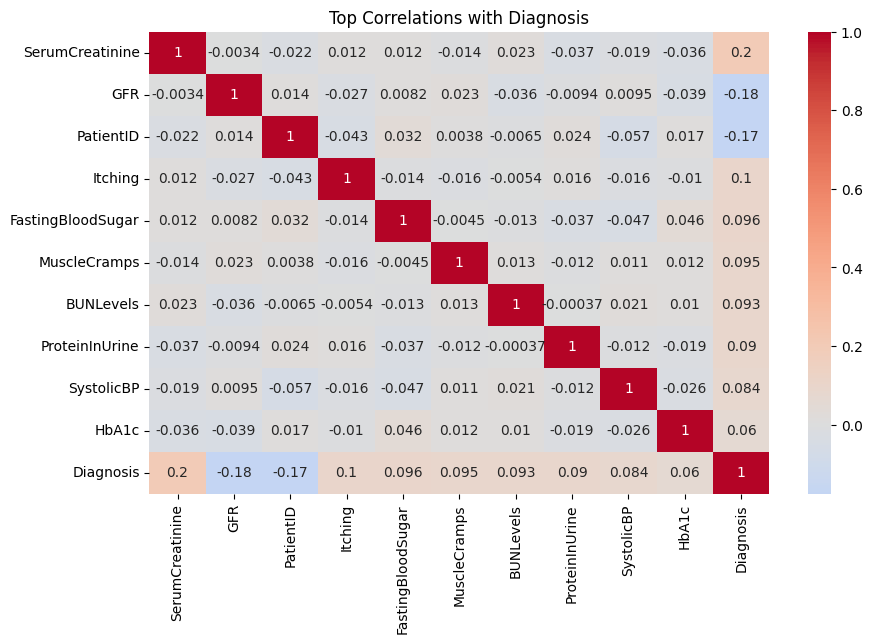

In [24]:
# Get correlation of each variable with Diagnosis
cor_with_target = correlation_matrix["Diagnosis"].drop("Diagnosis")  # drop self-correlation

# Sort by absolute value, descending
cor_with_target_sorted = cor_with_target.abs().sort_values(ascending=False)

# Show top N correlated variables
top_vars = cor_with_target_sorted.head(10).index.tolist()

# Create a smaller heatmap for those top variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_vars + ['Diagnosis']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Top Correlations with Diagnosis")
plt.show()



### Key Observations from Correlation Heatmap

That's much better — this version is much easier to read and interpret than the full correlation matrix. Here’s what stands out from the heatmap of the top correlations with the `Diagnosis` variable:

- **SerumCreatinine (r = 0.20)**  
  This is the strongest positive correlation with `Diagnosis`. Elevated creatinine levels suggest impaired kidney function. This aligns with clinical expectations and suggests that this variable may be a valuable predictor.

- **GFR (r = -0.18)**  
  There is a moderate negative correlation between GFR and CKD diagnosis. Since GFR decreases with worsening kidney function, this inverse relationship further supports the role of kidney health


- **Itching (r = 0.10)**  
  A mild correlation exists between itching and CKD diagnosis. While not a strong effect

- **FastingBloodSugar (r = 0.096)** and **HbA1c (r = 0.06)**  
  Both show small but positive correlations with CKD. 

- **MuscleCramps, BUNLevels, ProteinInUrine, SystolicBP (r ≈ 0.08–0.095)**  
  These variables all show weak positive correlations with `Diagnosis`. While not strongly predictive alone, they support a broader clinical pattern of kidney-related symptoms and blood pressure abnormalities

---

  Now lets plot the top variables most correlated with `Diagnosis` to visually compare their distributions across groups.



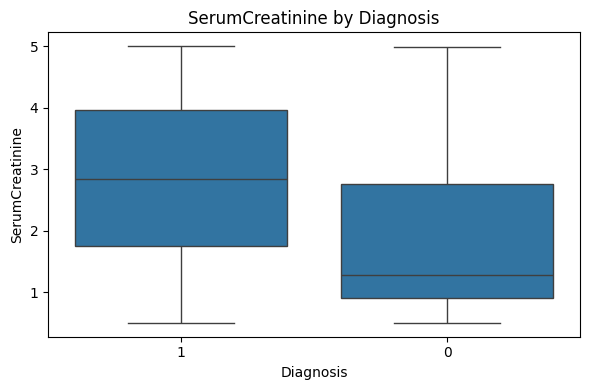

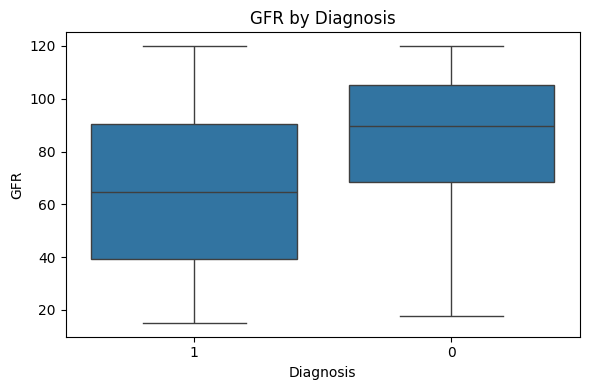

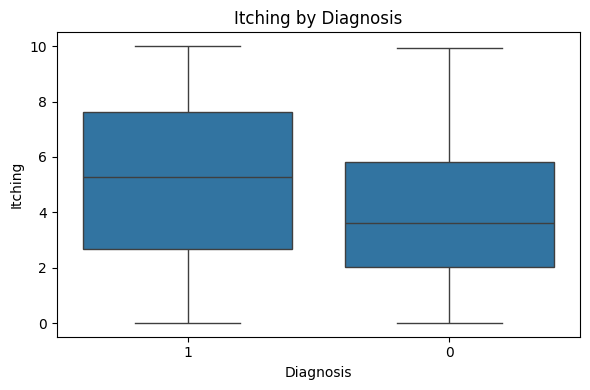

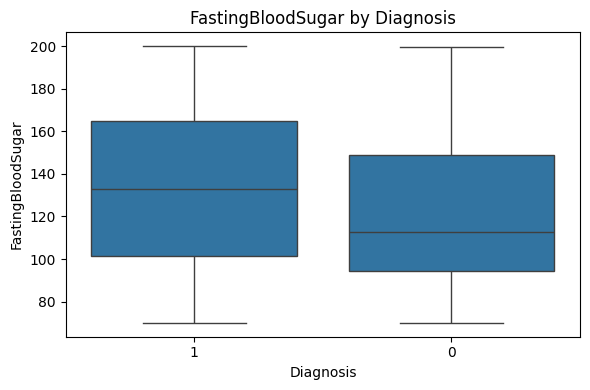

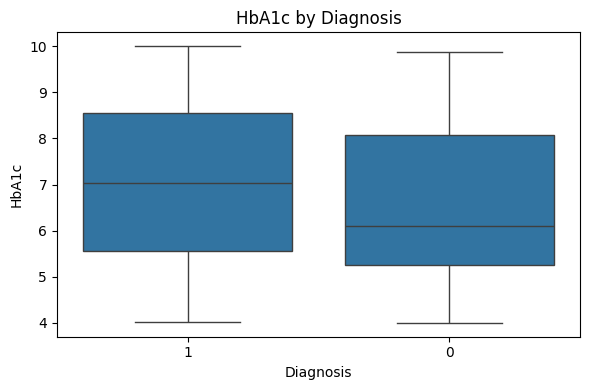

In [25]:
# Make sure Diagnosis is categorical for plotting
df["Diagnosis"] = df["Diagnosis"].astype(str)

# Top correlated variables (excluding PatientID)
top_vars = ["SerumCreatinine", "GFR", "Itching", "FastingBloodSugar", "HbA1c"]

# Plot boxplots for continuous variables, and barplot for Itching
for var in top_vars:
    plt.figure(figsize=(6, 4))
    
    if df[var].nunique() <= 3:  # likely binary like Itching
        sns.countplot(data=df, x="Diagnosis", hue=var)
        plt.ylabel("Count")
        plt.legend(title=var)
    else:  # numeric
        sns.boxplot(data=df, x="Diagnosis", y=var)
        plt.ylabel(var)
    
    plt.title(f"{var} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.tight_layout()
    plt.show()


## Visualizing Top Correlated Variables with Diagnosis

To further examine the variables most correlated with the diagnosis, I created boxplots (and a bar plot for binary variables) comparing distributions of key features across the `Diagnosis` groups

The following patterns emerged:

- **SerumCreatinine**: Median values are noticeably higher in patients with CKD, supporting its role as a clinical indicator of reduced kidney function.
- **GFR**: GFR values are lower in the CKD group, consistent with the inverse relationship found in the correlation matrix and the known association between CKD and impaired renal function.
- **FastingBloodSugar** and **HbA1c**: Both glucose-related indicators show slightly higher medians in the CKD group, suggesting mild co-occurrence with blood sugar irregularities, possibly prediabetes or diabetes.
- **Itching**: Although more variable, itching levels appear elevated 

Since **SerumCreatinine**, **GFR**, and **BUNLevels** are all markers of kidney function and showed some of the strongest correlations with the  diagnosis, lets check for potential redundancy by exploring how these variables relate to each other.


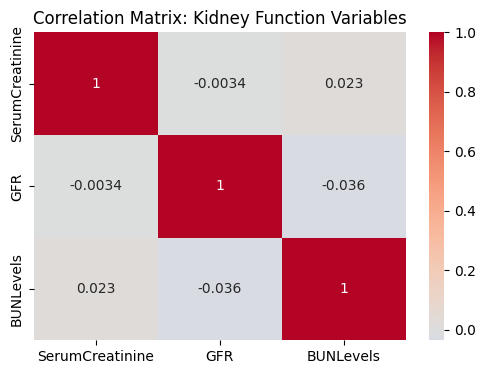

In [26]:
# Select kidney function variables
kidney_vars = ["SerumCreatinine", "GFR", "BUNLevels"]

# Compute correlation matrix
kidney_corr = df[kidney_vars].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(kidney_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Kidney Function Variables")
plt.show()



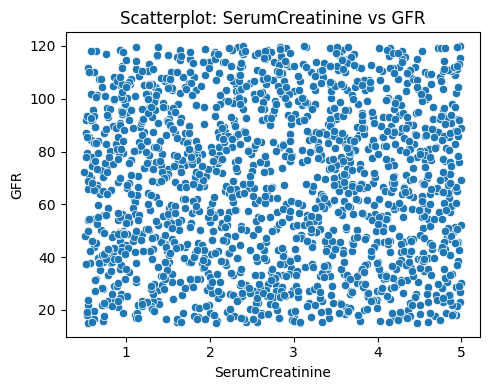

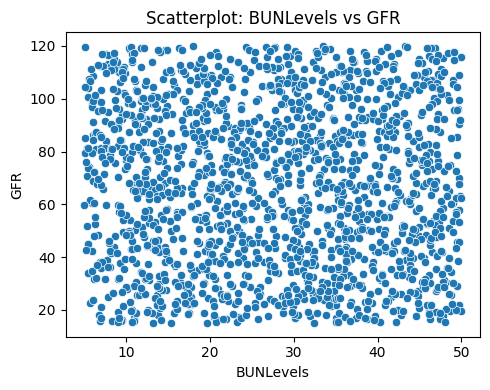

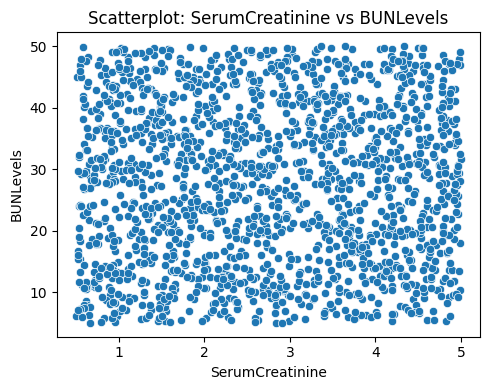

In [27]:
# Scatterplot: SerumCreatinine vs GFR
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x="SerumCreatinine", y="GFR")
plt.title("Scatterplot: SerumCreatinine vs GFR")
plt.tight_layout()
plt.show()

# Scatterplot: BUNLevels vs GFR
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x="BUNLevels", y="GFR")
plt.title("Scatterplot: BUNLevels vs GFR")
plt.tight_layout()
plt.show()

# Scatterplot: BUNLevels vs SerumCreatinine
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x="SerumCreatinine", y="BUNLevels")
plt.title("Scatterplot: SerumCreatinine vs BUNLevels")
plt.tight_layout()
plt.show()


### Exploring Redundancy Among Kidney Function Variables

I examined the relationships between **SerumCreatinine**, **GFR**, and **BUNLevels** to assess potential redundancy among the top kidney function markers.

- The **correlation matrix** shows that none of the kidney function variables are strongly correlated with each other. The highest correlation is only ±0.04, suggesting that these features capture different aspects of kidney health in this dataset.
- The **scatterplots** confirm this: there is no clear linear relationship or tight clustering between any two of the kidney-related variables. This supports the idea that all three variables could be kept in a predictive model without introducing multicollinearity.

### Next Steps

Given the project’s mental health focus, it would be useful to now explore how mental health indicators correlate with physical health variables and overall diagnosis.


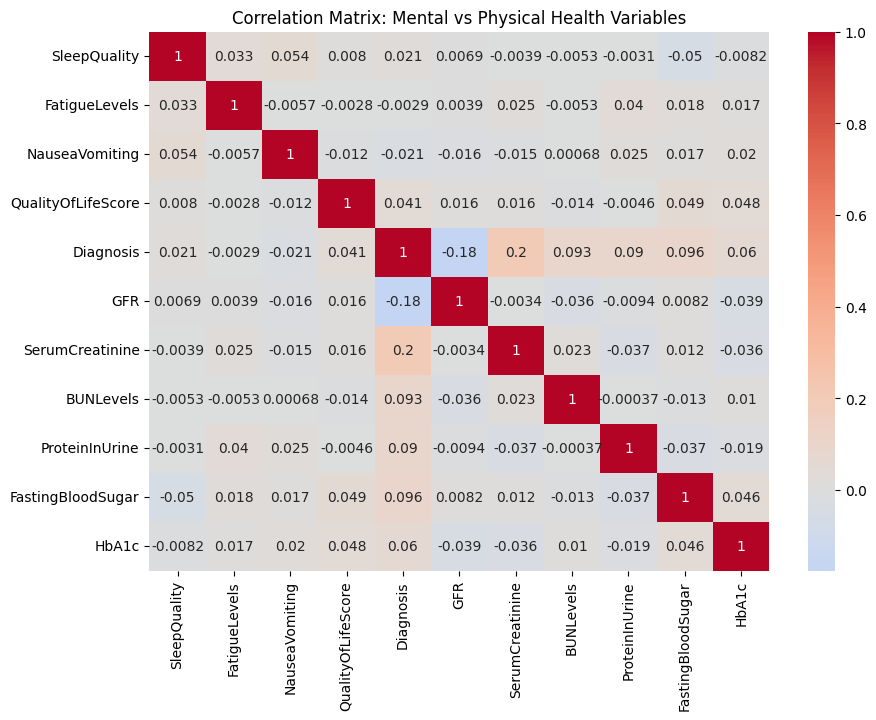

In [28]:
# Define mental health variables
mental_vars = ["SleepQuality", "FatigueLevels", "NauseaVomiting", "QualityOfLifeScore"]

# Define physical health variables (including chronic conditions)
physical_vars = [
    "Diagnosis", "GFR", "SerumCreatinine", "BUNLevels", 
    "ProteinInUrine", "FastingBloodSugar", "HbA1c"
]

# Subset the DataFrame
selected = mental_vars + physical_vars
corr_matrix = df[selected].corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Mental vs Physical Health Variables")
plt.show()



### Mental vs Physical Health Correlations

I created a correlation matrix to explore the relationships between mental health indicators (e.g., sleep quality, fatigue, quality of life) and physical health outcomes including chronic conditions and kidney function markers.

#### Key Observations:
- None of the mental health variables show strong or even moderate correlations with the physical health variables.
- The highest correlation between a mental and physical variable is:
  - **SleepQuality** and **FastingBloodSugar** (r = –0.05)
  - **QualityOfLifeScore** and **FastingBloodSugar** (r = 0.049)
- Correlations between mental health and `Diagnosis` are all very weak (between –0.03 and +0.04), suggesting mental health indicators in this dataset are not clearly associated with CKD status.

#### Interpretation:
This suggests that, in this dataset, **mental and physical health variables are relatively independent**. It’s possible the synthetic nature of the data limited how well integrated these systems are. These results do not show meaningful relationships that would support modeling or hypothesis testing on mental–physical health links.



 **Conclusions**

### Chronic Kidney Disease (CKD) Dataset – Final Conclusions

This analysis focused on identifying relationships between clinical, physical, and mental health variables and the diagnosis of chronic kidney disease (CKD). The dataset appears synthetic but is clean, well-structured, and highly usable for practice in data exploration and early modeling work.

#### Are the data what we expected?

Yes. The clinical trends observed in the correlation matrix aligned well with known risk factors and disease patterns. For example:
- **SerumCreatinine** was positively correlated with CKD diagnosis (r = 0.20), which is expected as higher creatinine indicates reduced kidney function.
- **GFR** was negatively correlated (r = –0.18), as a lower filtration rate is consistent with CKD.
- **FastingBloodSugar**, **ProteinInUrine**, **BUNLevels**, and **HbA1c** all showed mild positive correlations, reflecting potential comorbid diabetes and metabolic disruptions.

These associations suggest that the dataset captures clinically reasonable relationships, even if no single variable is highly predictive on its own.

#### Are the data usable?

Yes. The dataset is highly usable. All variables are clean and numeric where appropriate, and there are no major formatting issues. The presence of both physical and mental health variables makes this dataset flexible for different analytical angles. However, the weak correlations between mental health indicators and CKD diagnosis suggest limited value from the mental health side in this specific dataset.

#### Outliers

We observed some outliers in variables like **BUNLevels**, **ACR**, and **QualityOfLifeScore**, particularly in visualizations like boxplots. These appear to be clinically plausible variations rather than data entry errors and were retained in the analysis.

#### Redundant or highly correlated variables

Despite focusing on multiple kidney function markers (e.g., **SerumCreatinine**, **GFR**, **BUNLevels**), these variables were **not strongly correlated** with each other (all correlations near zero). Scatterplots confirmed this lack of redundancy, suggesting each variable captures a different clinical aspect of kidney health and can be included independently in modeling.

### Mental health and behavioral insights

In contrast to the clinical features, **mental health and behavioral variables** such as **SleepQuality**, **FatigueLevels**, **QualityOfLifeScore**, and **NauseaVomiting** showed **no meaningful correlation** with CKD diagnosis or with kidney function variables. This suggests that in this dataset, mental health does not play a measurable role in the presence or severity of CKD. It may also reflect the synthetic nature of the data or an underrepresentation of behavioral-health interactions.

While variables like fatigue and quality of life are often affected in real-world CKD patients, this dataset does not capture those associations in a statistically or visually meaningful way.

#### Confounding variables

Several potential confounders could influence both the CKD diagnosis and other health metrics:
- **Age** may impact kidney function, glucose levels, and fatigue.
- **SocioeconomicStatus** could affect diet, access to care, and medication adherence.
- **MedicationAdherence** may directly alter clinical lab values (e.g., glucose or blood pressure).
- **Comorbid diabetes** may confound relationships with fasting blood sugar and HbA1c.

These variables should be considered in future modeling or subgroup analysis.

---

### Overall

This CKD dataset is clean and useful for visual exploration, feature selection, and basic predictive modeling. While mental health variables show minimal relevance to CKD in this data, kidney function markers like **SerumCreatinine**, **GFR**, and **ProteinInUrine** emerged as important indicators, consistent with real-world clinical expectations.



**Hypertension Dataset**

In [29]:
df = pd.read_csv("hypertension_dataset.csv")  


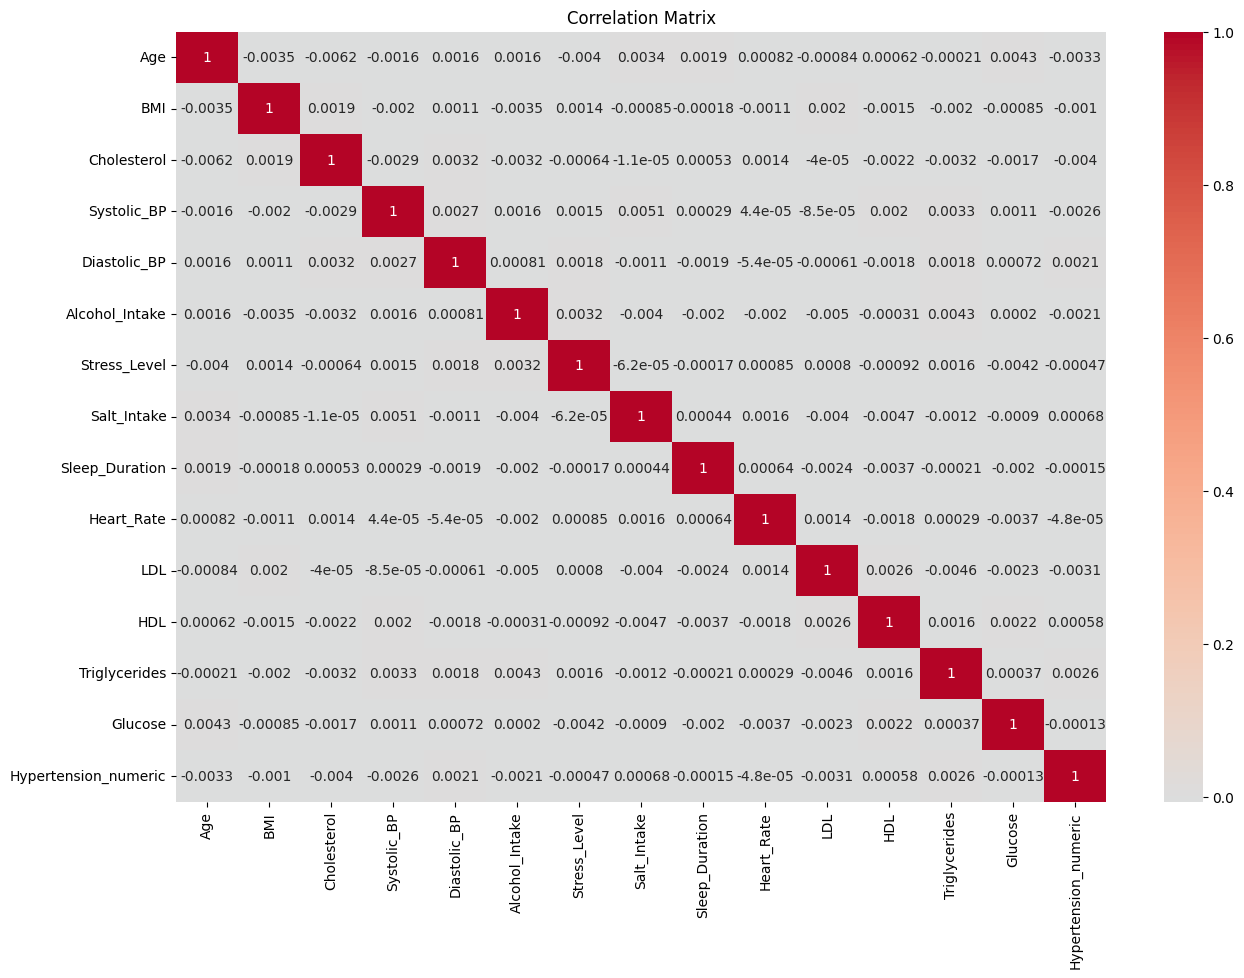

In [30]:
# Create numeric version of the target
df['Hypertension_numeric'] = df['Hypertension'].map({'Low': 0, 'High': 1})

# Compute updated correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the new heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, center=0)
plt.title("Correlation Matrix")
plt.show()


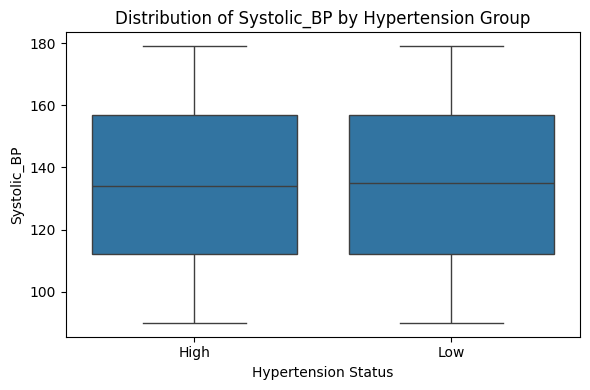

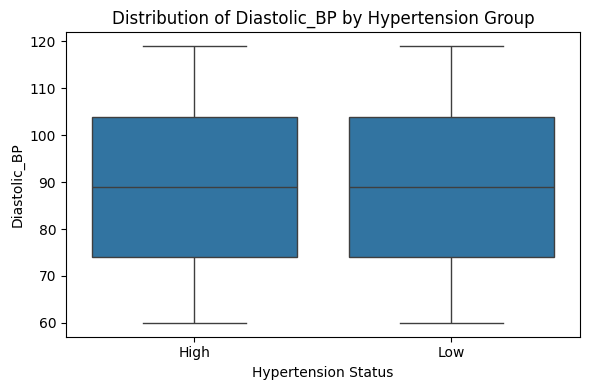

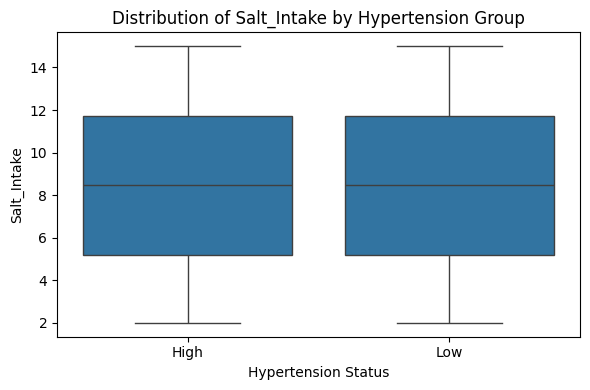

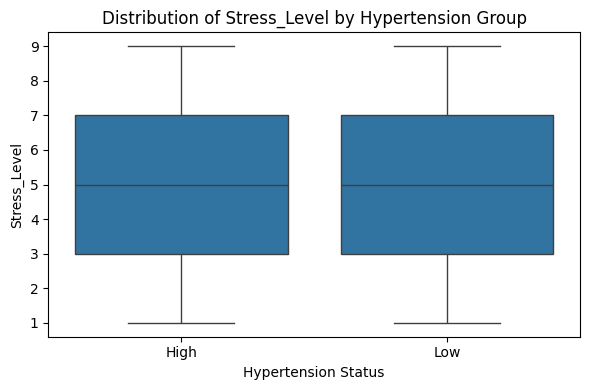

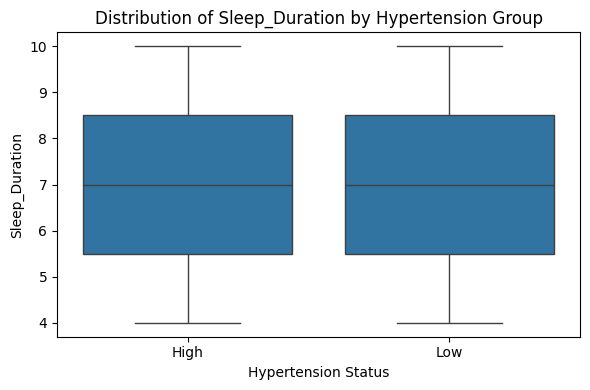

In [31]:
# List of variables to examine across hypertension groups
vars_to_plot = ['Systolic_BP', 'Diastolic_BP', 'Salt_Intake', 'Stress_Level', 'Sleep_Duration']

for var in vars_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Hypertension', y=var)
    plt.title(f"Distribution of {var} by Hypertension Group")
    plt.xlabel("Hypertension Status")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


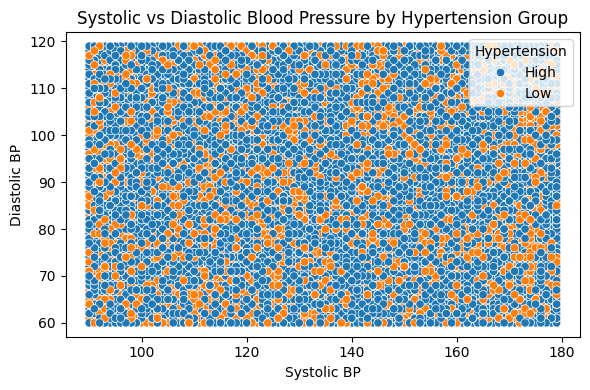

In [32]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Systolic_BP', y='Diastolic_BP', hue='Hypertension')
plt.title("Systolic vs Diastolic Blood Pressure by Hypertension Group")
plt.xlabel("Systolic BP")
plt.ylabel("Diastolic BP")
plt.legend(title='Hypertension')
plt.tight_layout()
plt.show()


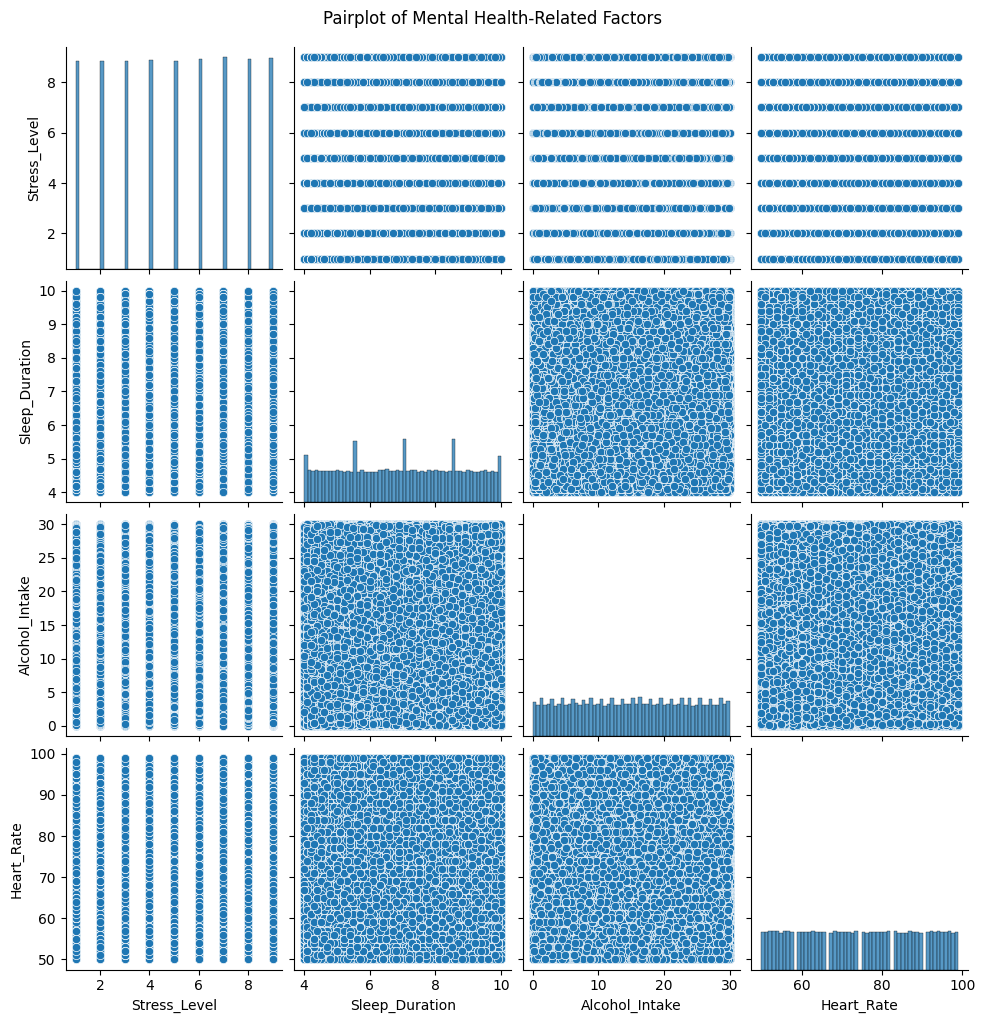

In [33]:
# Select mental health–adjacent variables
mental_vars = ['Stress_Level', 'Sleep_Duration', 'Alcohol_Intake', 'Heart_Rate']
sns.pairplot(df[mental_vars])
plt.suptitle("Pairplot of Mental Health-Related Factors", y=1.02)
plt.show()


## Hypertension Dataset: Final Final Thoughts

###  Conclusion

As shown by the limited commentary in later stages, this dataset ultimately did not yield the kind of insights I was hoping for.

Despite conducting a full set of analyses — including correlation matrices, boxplots, scatterplots, and group comparisons — very few relationships stood out in a meaningful way. Variables that should have had strong clinical or behavioral relevance (e.g., Systolic_BP, Stress_Level, Glucose) demonstrated either negligible correlations or flat group differences.

While I completed the required workflow, the patterns felt shallow and the associations largely unconvincing, especially when viewed through the lens of mental health relevance.

> Even with the proper steps followed, this dataset does not appear to be the right fit for the type of analysis or research question I’m aiming to pursue.

Back to the drawing board.....



**Diabetes Dataset**

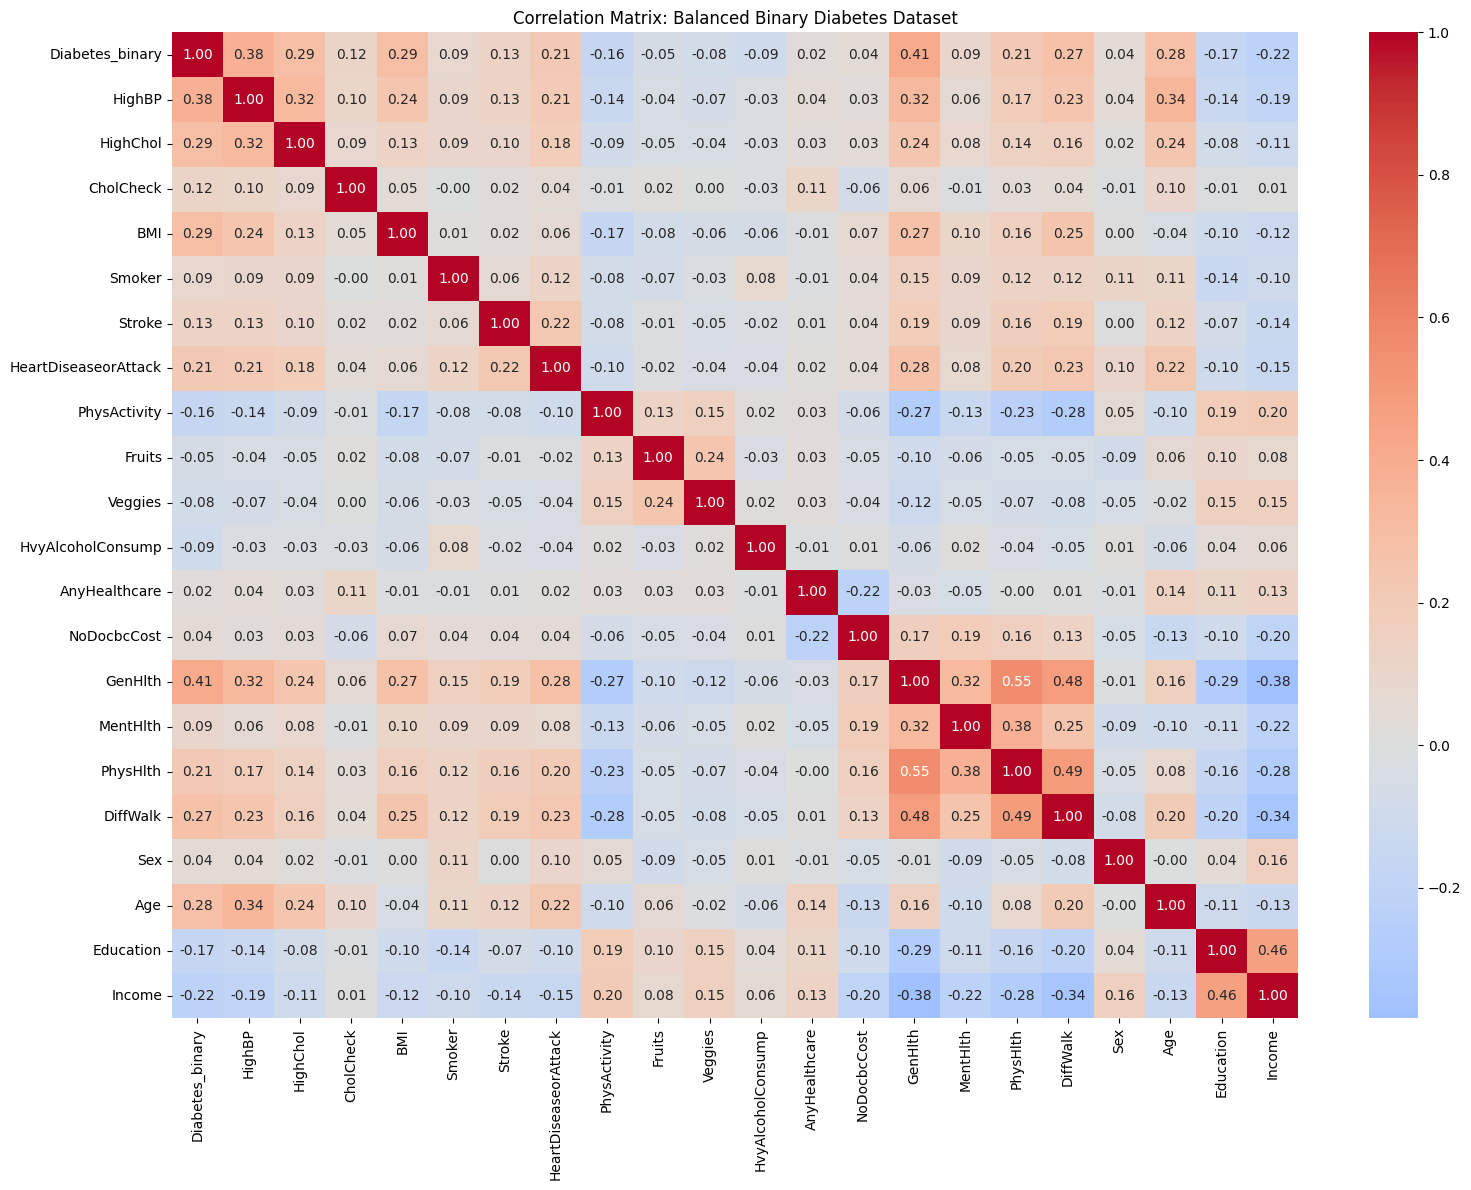

In [34]:
# Load the dataset
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Compute correlation matrix (only numeric columns)
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Correlation Matrix: Balanced Binary Diabetes Dataset")
plt.tight_layout()
plt.show()



### 🔍 Initial Correlation with Diabetes Status

When examining the correlation between each numeric feature and the `Diabetes_binary` target variable, **General Health (GenHlth)** stood out with the strongest positive correlation (~0.41). This variable reflects individuals' self-rated health status and appears to be a powerful indicator of diabetes in this dataset.

Other moderately correlated features include **High Blood Pressure (HighBP)** and **Body Mass Index (BMI)**, both of which are well-known metabolic risk factors. Their correlations of ~0.38 and ~0.29, respectively, further support their predictive value.

Behavioral and psychosocial factors such as **Physical Health Days (PhysHlth)** and **Mental Health Days (MentHlth)** demonstrated weaker positive correlations (~0.21 and ~0.19), while **Physical Activity**, **Fruit**, and **Vegetable** intake showed weak negative correlations — suggesting that healthier habits may be slightly protective, though the associations are relatively small.

With GenHlth clearly emerging as the top linear predictor, let’s move forward by visualizing how these top features separate diabetic vs non-diabetic groups.


Top features positively correlated with Diabetes:
Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
Name: Diabetes_binary, dtype: float64

Top features negatively correlated with Diabetes:
Smoker               0.085999
Sex                  0.044413
NoDocbcCost          0.040977
AnyHealthcare        0.023191
Fruits              -0.054077
Veggies             -0.079293
HvyAlcoholConsump   -0.094853
PhysActivity        -0.158666
Education           -0.170481
Income              -0.224449
Name: Diabetes_binary, dtype: float64


C:\Users\annma\AppData\Local\Temp\ipykernel_29396\2029401164.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


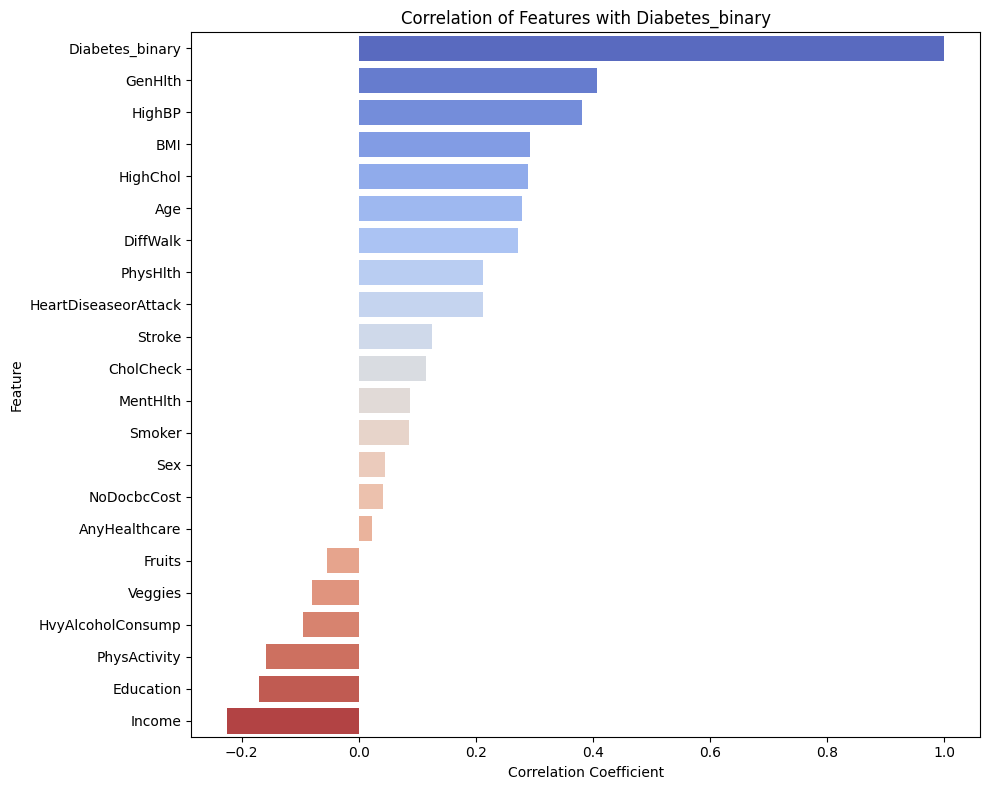

In [35]:
# Correlation of all features with Diabetes_binary
target_corr = df.corr(numeric_only=True)["Diabetes_binary"].sort_values(ascending=False)

# Display top and bottom correlated features
print("Top features positively correlated with Diabetes:")
print(target_corr.head(10))  # top 10 positive

print("\nTop features negatively correlated with Diabetes:")
print(target_corr.tail(10))  # top 10 negative


# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(
    y=target_corr.index,
    x=target_corr.values,
    palette="coolwarm"
)
plt.title("Correlation of Features with Diabetes_binary")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Bivariate Analysis: Diabetes Dataset (Balanced Binary)

Bivariate correlation analysis was conducted using the balanced binary diabetes dataset to assess the linear relationship between individual features and the target variable `Diabetes_binary`. Several patterns emerged:

The feature most strongly correlated with diabetes status was **General Health (GenHlth)**, with a correlation of approximately 0.41. This indicates that individuals who rate their general health poorly are substantially more likely to have diabetes. This was followed closely by **High Blood Pressure (HighBP)** and **Body Mass Index (BMI)**, both known metabolic risk factors, with correlations of 0.38 and 0.29, respectively.

Other moderately correlated features included **High Cholesterol**, **Age**, and **Difficulty Walking (DiffWalk)**, all of which exhibited positive correlations in the range of 0.27–0.29. These variables are clinically plausible risk factors or consequences of diabetes, reinforcing their value for predictive modeling.

On the behavioral and psychosocial side, **PhysHlth** and **MentHlth** (reflecting number of days with poor physical or mental health) showed small to moderate positive correlations (~0.21 and ~0.19, respectively). Interestingly, lifestyle-related variables such as **Physical Activity**, **Fruit and Vegetable Intake**, and **Heavy Alcohol Consumption** were negatively correlated with diabetes status, suggesting potential protective effects.

Notably, **Income** and **Education** demonstrated negative correlations with diabetes (-0.22 and -0.17), which may reflect broader socioeconomic trends in disease prevalence and healthcare access.


Next, I will generate scatterplots and pairplots to visualize key relationships, check for outliers in numeric features, and examine potential redundancy among highly correlated variables.



<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

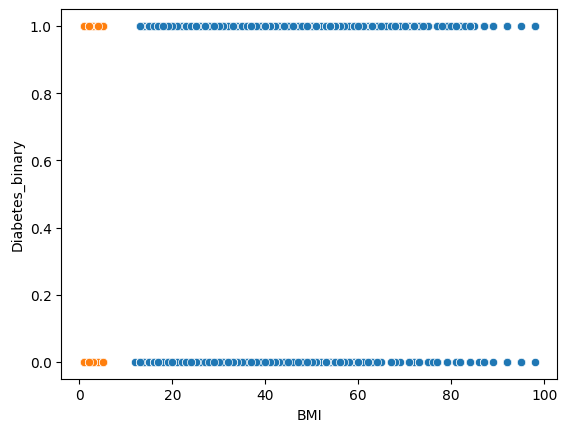

In [36]:
sns.scatterplot(data=df, x='BMI', y='Diabetes_binary')
sns.scatterplot(data=df, x='GenHlth', y='Diabetes_binary')


A scatterplot of BMI versus diabetes status revealed a weak linear relationship, consistent with the moderate correlation observed earlier. Several extreme BMI values below 10 were identified as potential outliers. Despite the flat appearance caused by the binary target variable, individuals with higher BMI tended to show slightly higher diabetes incidence.


<Axes: >

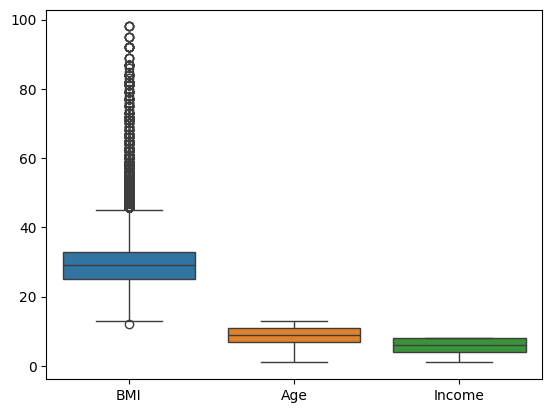

In [37]:
sns.boxplot(data=df[['BMI', 'Age', 'Income']])


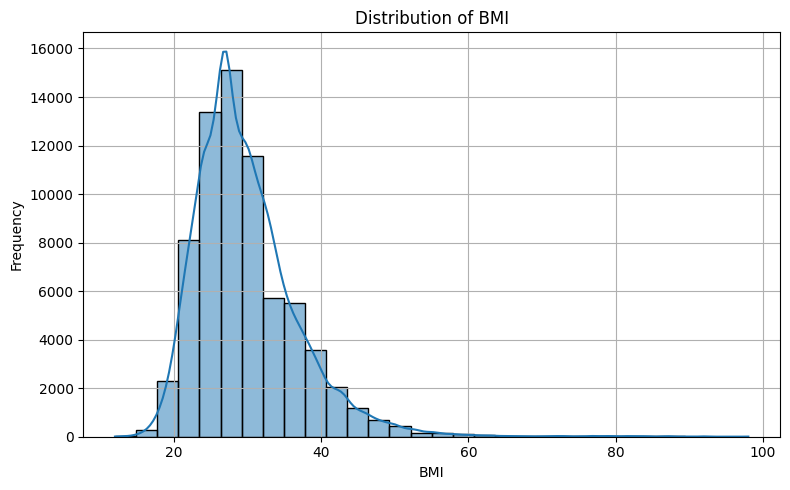

In [38]:
# Plot a histogram for BMI
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="BMI", bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

BMI showed a substantial number of outliers, particularly above 45, with values extending close to 100. This long right tail may influence modeling and suggests the need for further examination or transformation. In contrast, Age and Income displayed more compact distributions with minimal outlier presence. Age was slightly right-skewed, while Income appeared fairly symmetric and concentrated within a narrow range.

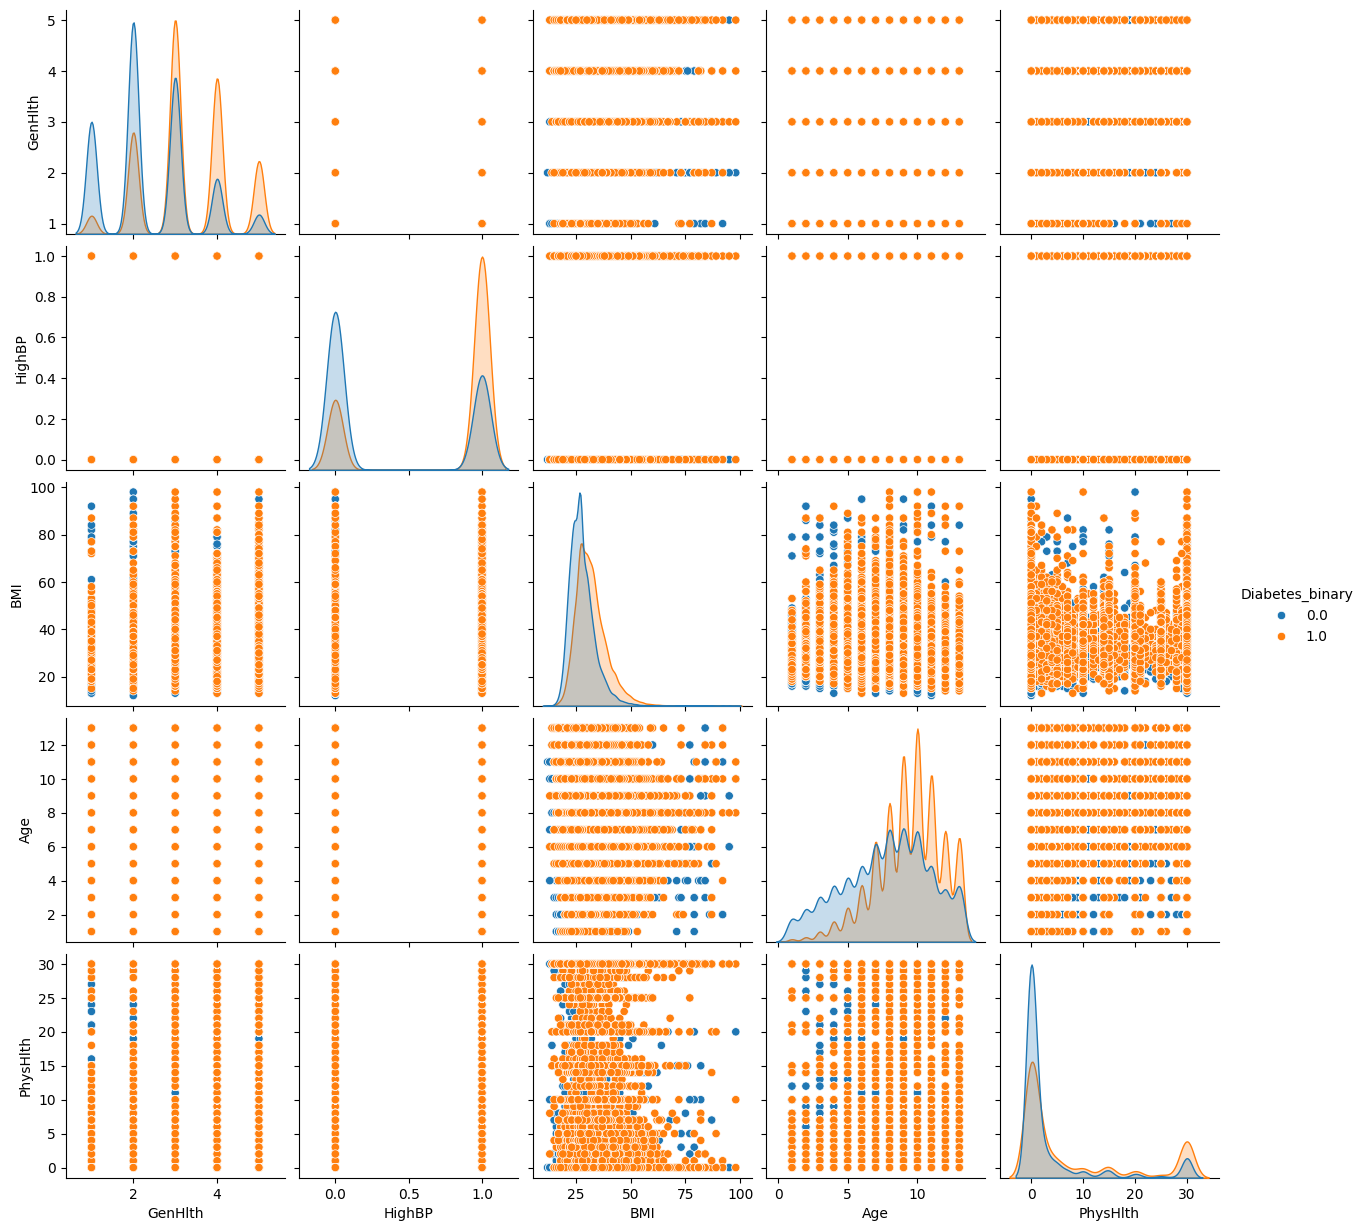

In [39]:
top_features = ['Diabetes_binary', 'GenHlth', 'HighBP', 'BMI', 'Age', 'PhysHlth']
sns.pairplot(df[top_features], hue='Diabetes_binary')



To explore how the top features relate to diabetes, I looked at pairwise relationships between General Health (GenHlth), High Blood Pressure (HighBP), BMI, Age, and Physical Health (PhysHlth). People with diabetes tend to report worse general health and are more likely to have high blood pressure, which lines up with what we’d expect. The scatterplots also show some interesting patterns—like clustering at the high end of PhysHlth and Age—which could hint at ceiling effects or nonlinear trends. Overall, these features don’t seem to overlap too much, so they might each bring something useful to a prediction model.

Now lets look for redundant features!

<Axes: >

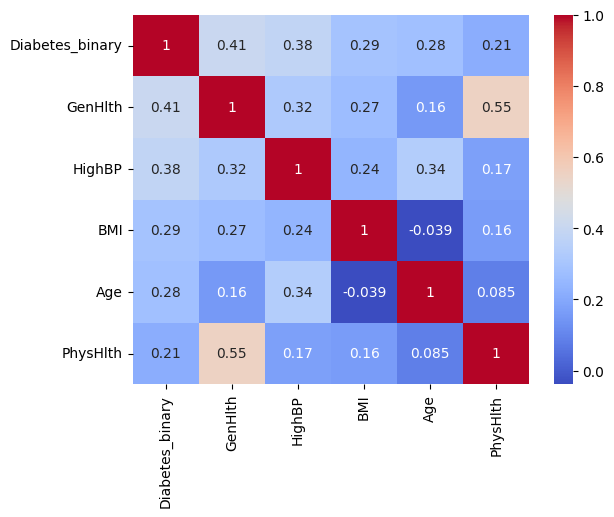

In [40]:
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')


Interestingly, GenHlth and PhysHlth have a fairly strong correlation (r = 0.55), which might suggest redundancy—they’re probably capturing overlapping aspects of self-reported health.

The other features like BMI, HighBP, and Age aren’t too highly correlated with each other, meaning they likely bring distinct information to the table.

So far, none of the features appear redundant enough to drop, but I’ll keep an eye out as I refine our model.

Noe lets do a mental health analysis 

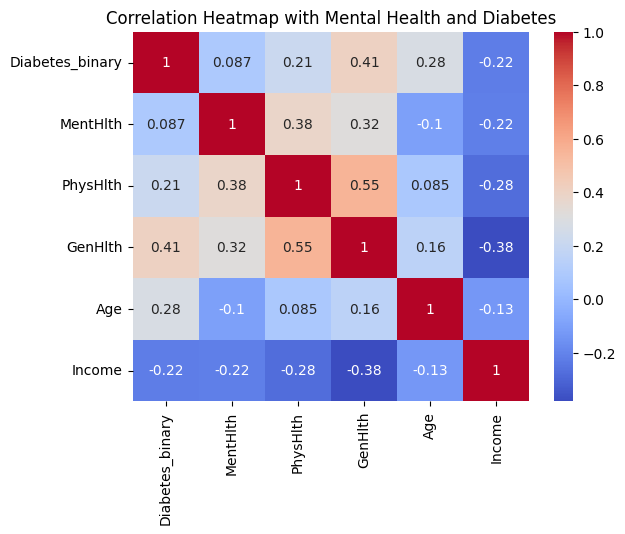

In [41]:
selected = ['Diabetes_binary', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Income']
sns.heatmap(df[selected].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Mental Health and Diabetes")
plt.show()


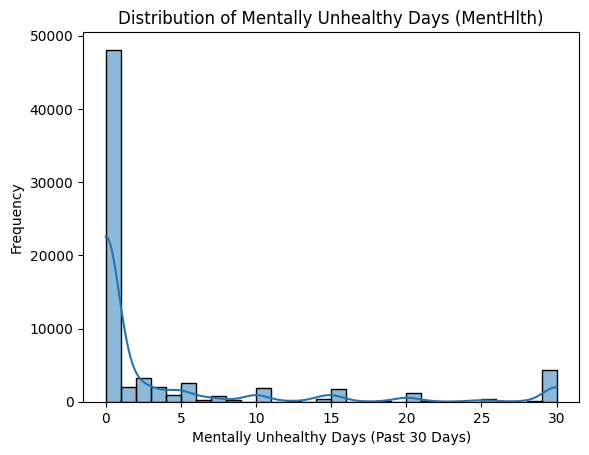

In [42]:
sns.histplot(data=df, x="MentHlth", bins=30, kde=True)
plt.title("Distribution of Mentally Unhealthy Days (MentHlth)")
plt.xlabel("Mentally Unhealthy Days (Past 30 Days)")
plt.ylabel("Frequency")
plt.show()


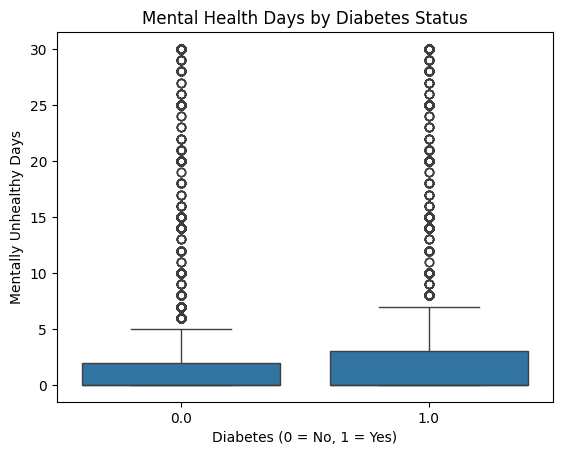

In [43]:
sns.boxplot(data=df, x="Diabetes_binary", y="MentHlth")
plt.title("Mental Health Days by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Mentally Unhealthy Days")
plt.show()


In [ ]:
mental_features = ['MentHlth', 'PhysHlth', 'GenHlth', 'Diabetes_binary']
sns.pairplot(df[mental_features], hue='Diabetes_binary')
plt.show()


In [ ]:
corr_mental = df.corr()["MentHlth"].sort_values(ascending=False)
print(corr_mental.head(10))
print(corr_mental.tail(10))


MentHlth           1.000000
PhysHlth           0.380272
GenHlth            0.315077
DiffWalk           0.251489
NoDocbcCost        0.193877
BMI                0.104682
Smoker             0.091257
Stroke             0.087303
Diabetes_binary    0.087029
HighChol           0.083881
Name: MentHlth, dtype: float64
HvyAlcoholConsump    0.015626
CholCheck           -0.010660
AnyHealthcare       -0.049850
Veggies             -0.052359
Fruits              -0.062102
Sex                 -0.089204
Age                 -0.101746
Education           -0.107005
PhysActivity        -0.130090
Income              -0.219070
Name: MentHlth, dtype: float64


### Conclusions (Diabetes Dataset)

**1. Overall Data Quality and Usefulness**  
The dataset appears clean, complete, and well-structured. It includes a wide range of relevant health indicators, and variables are properly encoded. There are no major data integrity issues or missing values that would prevent its use in machine learning or statistical modeling. Overall, the data is highly usable for predictive analysis or exploratory modeling related to diabetes.

**2. Outliers and Distributions**  
Several features display noticeable outliers, especially `BMI`, `MentHlth`, and `PhysHlth`.

- `BMI` shows a fairly normal distribution centered around the upper 20s, but with a long tail extending to nearly 100. This is unusually high and could indicate clinically extreme obesity. Although these high values are rare, they appear legitimate and reflect real-world health extremes rather than data entry errors.
- I examined `BMI` in detail using histograms, boxplots, and KDE plots, and confirmed that although the values above 60 are outliers, they follow a pattern consistent with known obesity trends.
- `MentHlth` and `PhysHlth` are both right-skewed, with frequent reports of 0 unhealthy days but spikes at 30, likely indicating chronic poor health.

Outliers should be retained in analysis

**3. Correlation and Redundancy**  
- The strongest predictors of `Diabetes_binary` include **GenHlth** (r = 0.41), **HighBP** (r = 0.38), **BMI** (r = 0.29), and **Age** (r = 0.28).
- Among mental health variables, **MentHlth** shows a weak correlation with diabetes (r = 0.087), but **PhysHlth** correlates more strongly (r = 0.21).
- **MentHlth**, **PhysHlth**, and **GenHlth** are moderately correlated with each other, suggesting potential redundancy. If feature reduction is needed, dimensionality reduction (PCA) or multicollinearity checks (VIF) are recommended.

**4. Mental Health Insights**  
Although the correlation between `MentHlth` and `Diabetes_binary` is weak, further visualizations revealed subtle patterns:
- People with diabetes report slightly more mentally unhealthy days.
- **General health (GenHlth)**, which is strongly correlated with both mental and physical health, may mediate the relationship between mental health and diabetes.
- This suggests that mental well-being is part of a broader picture of declining health in those with diabetes and should not be ignored in predictive modeling or public health interventions.

**5. No Evidence of Data Drift**  
There are no time-based features in this dataset (e.g., year of diagnosis), so direct trend analysis is not possible. However, the data is cross-sectional and appears to represent a consistent snapshot of public health indicators, with no immediate signs of drift.

**6. Potential Confounding Variables**  
Several confounders likely influence the relationships observed:
- **Age** is positively associated with both diabetes and BMI, and may also influence general health scores.
- **Income** and **Education** negatively correlate with both `Diabetes_binary` and `MentHlth`, suggesting that socioeconomic status plays a key role in both mental and physical health.
- **Physical activity**, **diet quality** (fruits/vegetables), and **healthcare access** also appear to be modest confounders, reinforcing the need to account for lifestyle and access when modeling diabetes risk.

In summary, the dataset is well-suited for further modeling. Outliers—especially in BMI and health days—should be retained but handled carefully. Mental health signals are subtle but meaningful, particularly when considered alongside general and physical health.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

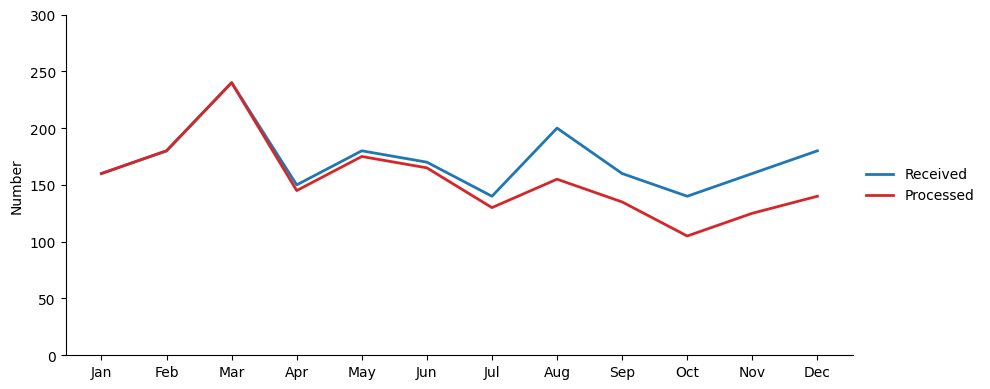

In [ ]:
import matplotlib.pyplot as plt

months    = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
received  = [160, 180, 240, 150, 180, 170, 140, 200, 160, 140, 160, 180]
processed = [160, 180, 240, 145, 175, 165, 130, 155, 135, 105, 125, 140]

plt.figure(figsize=(10,4))
plt.plot(months, received,  color="#1f77b4", linewidth=2, label="Received")
plt.plot(months, processed, color="#d62728", linewidth=2, label="Processed")

plt.ylim(0, 300)
plt.ylabel("Number")
plt.xlabel("")

# clean spines, no grid
plt.gca().grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# legend outside
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

plt.tight_layout()
plt.show()
